In this project we will see how we can add a watermark to an image. Adding a watermark works as a copyright for your image. so that no one can illegally use your image  or document. we will use opencv for the project to add logo and text as a watermark. 

In [1]:
# important library imports 

import cv2 
import numpy as np 
import requests 
from PIL import Image 

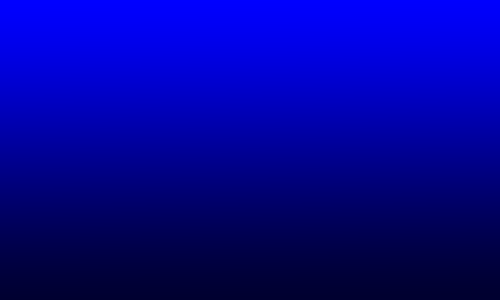

In [2]:
# Reading image from url

image = Image.open(requests.get('https://cdn.wallpapersafari.com/31/38/uoIYir.png', stream = True).raw)
image_logow = image.resize((500, 300))
image_textw = image.resize((500, 300))
image_logow

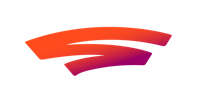

In [3]:
logo_image = Image.open(requests.get('https://purepng.com/public/uploads/large/google-stadia-logo-3cx.png', stream = True).raw)
logo = logo_image.resize((200, 100))
logo

In [4]:
# we will first convert them into RGB format and store it as a numpy array. Similarly we will also extract the shape ( height, weight)

image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [5]:
# Get the center of the image. It is the location where we will place watermark.

center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo 
right_x = left_x + w_logo 

In [6]:
# place where we will place our logo
#get ROI 
roi = image_logow[top_y: bottom_y, left_x: right_x]

#Add the logo to the ROI
result = cv2.addWeighted(roi, 1, logo, 1, 0)

#Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)

#Replace the ROI on the image 
image_logow[top_y: bottom_y, left_x: right_x] = result

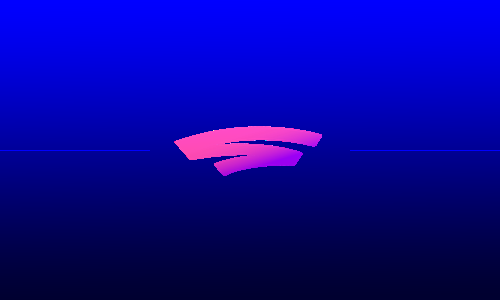

In [7]:
# plot logo watermark image 

img = Image.fromarray(image_logow, 'RGB')
img

In [18]:
# Text Watermark

image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='SunnyPaul', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5, color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

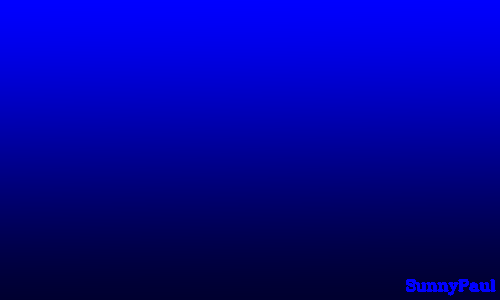

In [19]:
#Plotting text watermarking image 

timg = Image.fromarray(image_text, 'RGB')
timg